In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Parte A- Regresión

El data frame usado para el análisis de regresión fue tomado de Keggle.Contiene datos históricos del precio del oro en función de distintas variables tales como: S&P500, Down Jones, Precio del petróleo entre otros. Como se verá más adelante, es un data frame de 1718 instancias y 81 variables, de las cuales se tomarán para este ejercicio: Adj_close como variable de salida, y "SP_Ajclose", "DJ_Ajclose", "EU_Price", "OF_Price", "OS_Price", "SF_Price" serán las variables independientes.

In [32]:
# Lectura del data frame
data_frame = pd.read_csv ('https://raw.githubusercontent.com/dimelsasalazar/TIA-Actividad/main/FINAL_USO.csv')
data_frame

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,2018-12-24,119.570000,120.139999,119.570000,120.019997,120.019997,9736400,239.039993,240.839996,234.270004,...,20.650000,21.090000,21.090000,60507000,9.490000,9.520000,9.280000,9.290000,9.290000,21598200
1714,2018-12-26,120.620003,121.000000,119.570000,119.660004,119.660004,14293500,235.970001,246.179993,233.759995,...,20.530001,20.620001,20.620001,76365200,9.250000,9.920000,9.230000,9.900000,9.900000,40978800
1715,2018-12-27,120.570000,120.900002,120.139999,120.570000,120.570000,11874400,242.570007,248.289993,238.960007,...,20.700001,20.969999,20.969999,52393000,9.590000,9.650000,9.370000,9.620000,9.620000,36578700
1716,2018-12-28,120.800003,121.080002,120.720001,121.059998,121.059998,6864700,249.580002,251.399994,246.449997,...,20.570000,20.600000,20.600000,49835000,9.540000,9.650000,9.380000,9.530000,9.530000,22803400


In [3]:
data_frame.shape #Identificación del tamaño del data_frame

(1718, 81)

Este data frame tiene 1718 instancias y 81 variables, para este estudio solo se tomarán 7 de ellas, teniendo en consideración que una es la variable dependiente. 

In [4]:
data_frame.info() # revisión de las características del data frame


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1718 non-null   object 
 1   Open           1718 non-null   float64
 2   High           1718 non-null   float64
 3   Low            1718 non-null   float64
 4   Close          1718 non-null   float64
 5   Adj Close      1718 non-null   float64
 6   Volume         1718 non-null   int64  
 7   SP_open        1718 non-null   float64
 8   SP_high        1718 non-null   float64
 9   SP_low         1718 non-null   float64
 10  SP_close       1718 non-null   float64
 11  SP_Ajclose     1718 non-null   float64
 12  SP_volume      1718 non-null   int64  
 13  DJ_open        1718 non-null   float64
 14  DJ_high        1718 non-null   float64
 15  DJ_low         1718 non-null   float64
 16  DJ_close       1718 non-null   float64
 17  DJ_Ajclose     1718 non-null   float64
 18  DJ_volum

Del análisis de las variables se indentifica que hay 58 tipo flotante, 22 tipo entero y 1 tipo objeto. De igual manera se identifica que no se encuentra ningún dato faltante.

In [36]:
data_frame.describe() #descripción de las variables en térmnos de media, desviación estándar y cuartiles

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,...,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03
mean,127.323434,127.854237,126.777695,127.319482,127.319482,8.446327e+06,204.490023,205.372637,203.487014,204.491222,...,26.384575,26.715012,25.924624,4.356515e+07,22.113417,22.307148,21.904657,22.109051,22.109051,1.922313e+07
std,17.526993,17.631189,17.396513,17.536269,17.536269,4.920731e+06,43.831928,43.974644,43.618940,43.776999,...,10.490908,10.603110,9.886570,2.909151e+07,11.431056,11.478671,11.373997,11.432787,11.432787,1.575743e+07
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06,122.059998,122.320000,120.029999,120.290001,...,12.400000,12.470000,12.269618,4.729000e+06,7.820000,8.030000,7.670000,7.960000,7.960000,1.035100e+06
25%,116.220001,116.540001,115.739998,116.052502,116.052502,5.412925e+06,170.392498,170.962506,169.577499,170.397500,...,20.355000,20.585000,20.180950,2.259968e+07,11.420000,11.500000,11.300000,11.392500,11.392500,6.229500e+06
50%,121.915001,122.325001,121.369999,121.795002,121.795002,7.483900e+06,205.464996,206.459999,204.430000,205.529999,...,22.870001,23.054999,22.677604,3.730465e+07,16.450000,16.635001,16.040000,16.345000,16.345000,1.613015e+07
75%,128.427494,129.087498,127.840001,128.470001,128.470001,1.020795e+07,237.292500,237.722500,236.147503,236.889996,...,26.797500,27.317500,26.478154,5.697055e+07,34.419998,34.667499,34.110000,34.417499,34.417499,2.672375e+07
max,173.199997,174.070007,172.919998,173.610001,173.610001,9.380420e+07,293.089996,293.940002,291.809998,293.579987,...,56.770000,57.470001,54.617039,2.321536e+08,41.599998,42.299999,41.299999,42.009998,42.009998,1.102657e+08


### Análisis gráfico

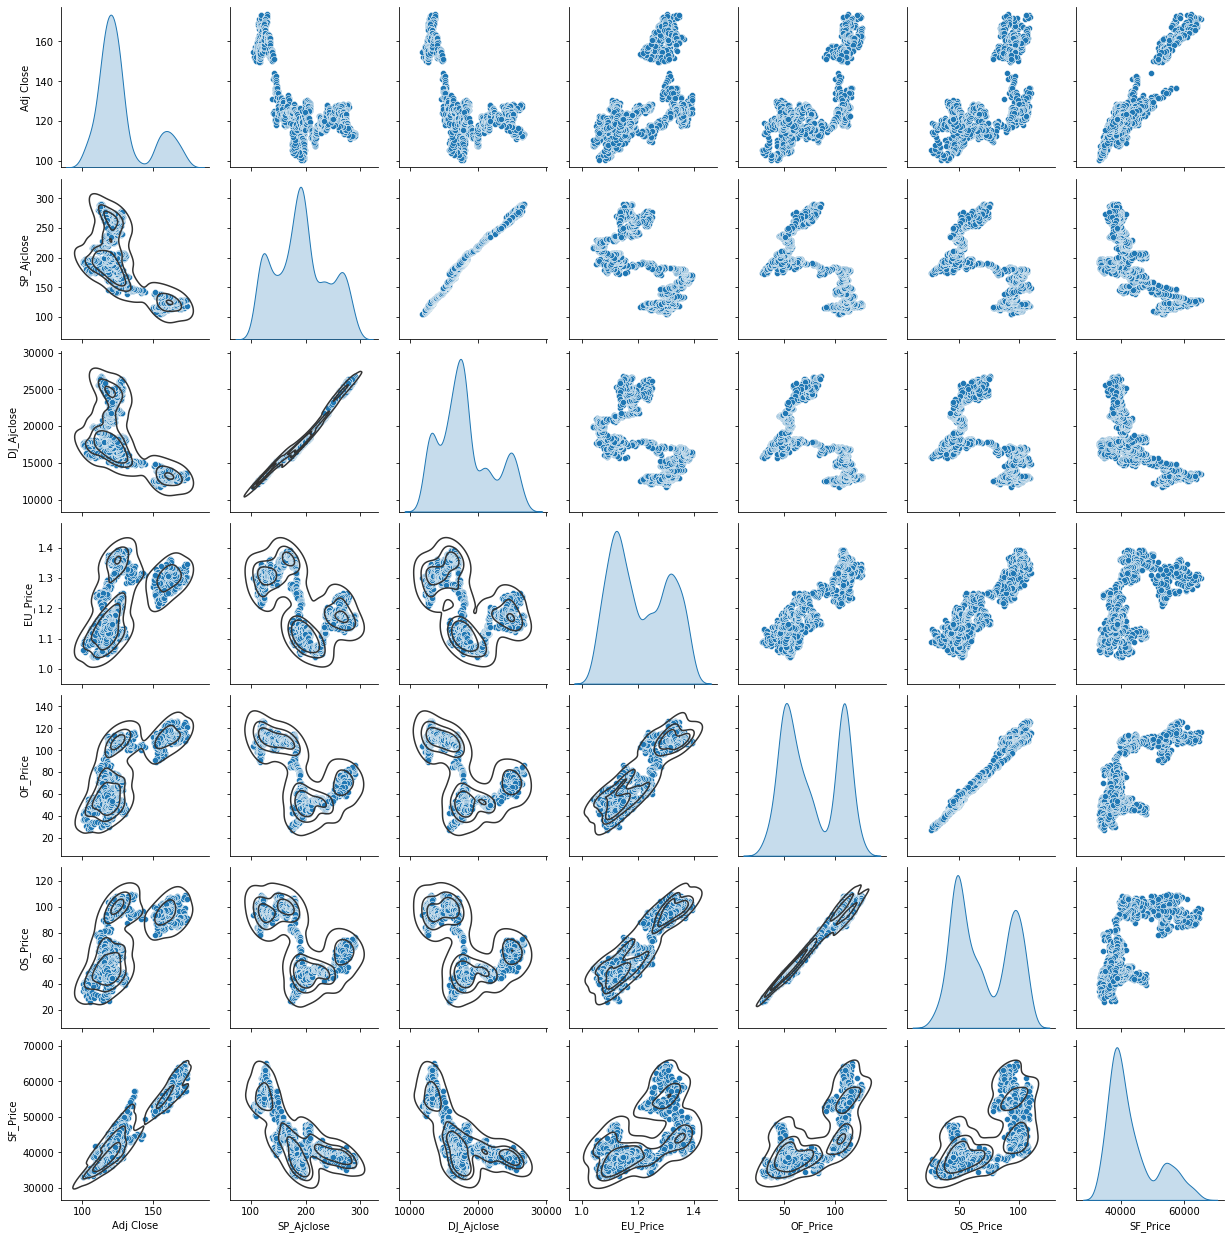

In [6]:
g = sns.pairplot(
    data_frame,
    x_vars=['Adj Close','SP_Ajclose', 'DJ_Ajclose', 'EU_Price', 'OF_Price', 'OS_Price', 'SF_Price'],
    y_vars=['Adj Close','SP_Ajclose', 'DJ_Ajclose', 'EU_Price', 'OF_Price', 'OS_Price', 'SF_Price'],diag_kind="kde"
)
g.map_lower(sns.kdeplot, levels=4, color=".2")

En la gráfica se visualiza la relación de pares de variables, de igual manera muestra que tipo de relaciones pude existir entre ellas, a fin de identificar si es necesario utilizar un método de normalización para los datos.

In [7]:
#Separo las variables independientes y dependiente, en x y y para la elaboración del modelo
x = data_frame[["SP_Ajclose", "DJ_Ajclose", "EU_Price", "OF_Price", "OS_Price", "SF_Price"]]
y = data_frame[["Adj Close"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [37]:
x.describe()

,SP_Ajclose,DJ_Ajclose,EU_Price,OF_Price,OS_Price,SF_Price
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000
mean,192.204570,18164.119043,1.208494,77.504523,70.153097,43284.478463
std,48.514161,3884.495887,0.100535,27.400703,23.471514,7530.704012
min,104.468536,11766.259770,1.038700,27.880000,26.550000,33170.000000
25%,153.027992,15495.665280,1.120800,52.152500,48.922500,38018.750000
50%,191.658341,17612.939455,1.184050,70.115000,64.680000,40521.500000
75%,228.721389,20851.157715,1.305550,107.730000,94.280000,46580.500000
max,290.560242,26828.390630,1.393400,126.220000,110.300000,65292.000000


Evaluando las variables, los máximos y mínimos de cada una, se identifica la necesidad o no de normalizar o no las variables. Para este caso se observa una variación importante, y apoyándose en el análisis gráfico es posible identificar que se requiere un tratamiento adicional de los datos para aplicar el modelo de regresión.

In [41]:
y.describe()

,Adj Close
count,1718.000000
mean,127.319482
std,17.536269
min,100.500000
25%,116.052502
50%,121.795002
75%,128.470001
max,173.610001


### Estandarización de las variables

In [40]:
#Estandarizar las variables para normalizar los datos mediante StandarScaler de sklearn
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_st = sc_x.fit_transform(x)

sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [39]:
model = LinearRegression()
model.fit (x_train,y_train)

LinearRegression()

### Validación del modelo

In [42]:
predic_adj_close = model.predict(x.head())
print(mean_absolute_error(y.head(),predic_adj_close))

predic_adj_close = model.predict(x)
print(mean_absolute_error(y, predic_adj_close))

153.77274230693675
127.30994082007095


0.20261287458592847
0.9250377626753024


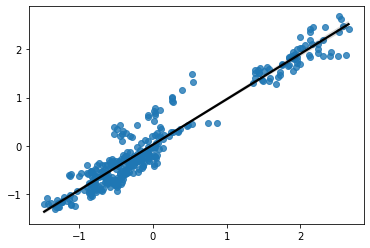

In [45]:
# Evaluando el modelo de regresión
model = LinearRegression().fit(x_train, y_train)
y_pred = model.predict(x_test)
print(mean_absolute_error(y_test, y_pred))
sns.regplot(x=y_test, y=y_pred, line_kws={"color":"black"})
r2 = r2_score(y_test, y_pred)
print(r2)

Text(0, 0.5, 'True Values')

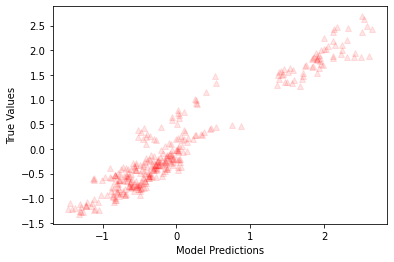

In [44]:
plt.plot(y_test, y_pred, "^", color = 'r', alpha = 0.1)
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

In [15]:
from sklearn import metrics

In [16]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.20261287458592847
MSE: 0.07630243960055992
RMSE: 0.27622896227687627


En las gráficas se puede observar que las predicciones vs los valores de reales se ajustan a una tendencia lineal, con una agrupación de puntosentre -1 y 0 y otra desde 1 y 2. Revisando los parámetros de evaluación del modelo como el mean_absolute_error = mae, mean_squared_error = mse cuyos valores son cercanos a cero y un indice de ajuste r2 de 0,92, por lo que puede decirse que es un buen modelo para predicción de estas variables. Cabe mencionar que esto se realizó con los valores estandarizados, por lo tanto, con los valores reales estos indicadores pueden variar un poco. 

## Parte A- Modelo de regresión con keras

Una vez se ha realizado el modelo aplicando regresión lineal; a continuación se hará la evaluación utilizando keras de tensorflow. De igual manera se hará la evaluación de los indicadores mae y mse, a fin de establecer un comparativo de los dos modelos.

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization

In [24]:
n_features = x_train.shape[1]

Para realizar la estructura secuencial se realiza una capa de entrada, 4 intermedias y una de salida. Usando un optimizador RMS, evaluando de igual manera las metricas de mse y mae. 

In [25]:
modelKeras = keras.Sequential()
modelKeras.add(Dense(64, input_dim = n_features))
modelKeras.add(Activation('relu'))
modelKeras.add(Dense(64))
modelKeras.add(Activation('relu'))
modelKeras.add(Dense(32))
modelKeras.add(Activation('relu'))
modelKeras.add(Dense(16))
modelKeras.add(Activation('linear'))
modelKeras.add(Dense(1))  
optimizer = tf.keras.optimizers.RMSprop(0.001)
modelKeras.compile(loss = 'mse', optimizer = optimizer, metrics=['mae'])
modelKeras.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                448       
                                                                 
 activation_4 (Activation)   (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 activation_5 (Activation)   (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 activation_6 (Activation)   (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 16)               

### Entrenar el modelo

In [26]:
epochs_hist = modelKeras.fit(x_train, y_train, epochs=100, batch_size = 20, validation_split = 0.2)

Epoch 1/100
55/55 [==============================] - 1s 3ms/step - loss: 528045.5625 - mae: 494.5819 - val_loss: 151749.5469 - val_mae: 383.0796
Epoch 2/100
55/55 [==============================] - 0s 1ms/step - loss: 160145.6406 - mae: 366.8146 - val_loss: 164823.7656 - val_mae: 402.0546
Epoch 3/100
55/55 [==============================] - 0s 1ms/step - loss: 117483.7344 - mae: 333.9974 - val_loss: 50118.0781 - val_mae: 219.6657
Epoch 4/100
55/55 [==============================] - 0s 1ms/step - loss: 76535.6328 - mae: 260.3688 - val_loss: 50601.3516 - val_mae: 223.7673
Epoch 5/100
55/55 [==============================] - 0s 1ms/step - loss: 44321.4648 - mae: 195.2747 - val_loss: 45291.5469 - val_mae: 208.3857
Epoch 6/100
55/55 [==============================] - 0s 1ms/step - loss: 26045.3457 - mae: 154.6084 - val_loss: 13478.7891 - val_mae: 115.3057
Epoch 7/100
55/55 [==============================] - 0s 1ms/step - loss: 18243.2676 - mae: 117.5079 - val_loss: 10801.1719 - val_mae: 100

In [27]:
result = modelKeras.evaluate(x_test, y_test)
print(f"Accuracy: {result}")

11/11 [==============================] - 0s 1ms/step - loss: 1.0184 - mae: 0.7589
Accuracy: [1.01838219165802, 0.758934736251831]


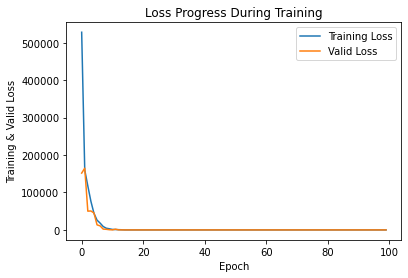

In [46]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training & Valid Loss')
plt.legend(['Training Loss','Valid Loss'])

### Evaluando el modelo

11/11 [==============================] - 0s 772us/step
0.7589347813603273
-0.0004950637280844994


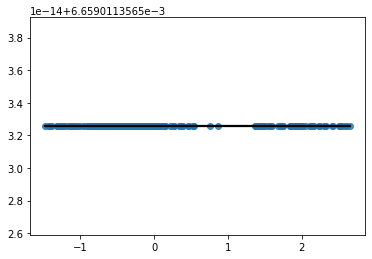

In [49]:
y_predict = modelKeras.predict(x_test)
print(mean_absolute_error(y_test, y_predict))
sns.regplot(x=y_test, y=y_predict, line_kws={"color":"black"})
r2 = r2_score(y_test, y_predict)
print(r2)

11/11 [==============================] - 0s 610us/step


Text(0, 0.5, 'True Values')

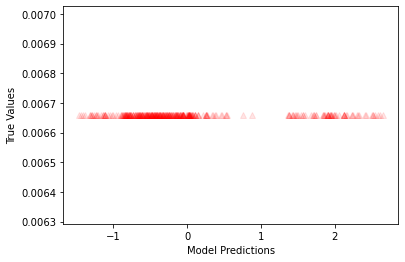

In [30]:
y_predict = modelKeras.predict(x_test)
plt.plot(y_test, y_predict, "^", color = 'r', alpha = 0.1)
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

In [31]:
print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

MAE: 0.7589347813603273
MSE: 1.0183822801353195
RMSE: 1.0091492853563935


Con relación al modelo realizado mediante regresión; utilizando redes neuronales presenta un mejor rendimiento el realizado mediante regresión, lo cual se evidencia en los vaores de mae y mse, ya que se alejan más de cero. 